# This is a Review of Glioma Classification

## Feature Distributions

**we will be running feature distributions to get some overviews of what the data looks like and the distribution of our variables**

In [30]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;



<IPython.core.display.Javascript object>

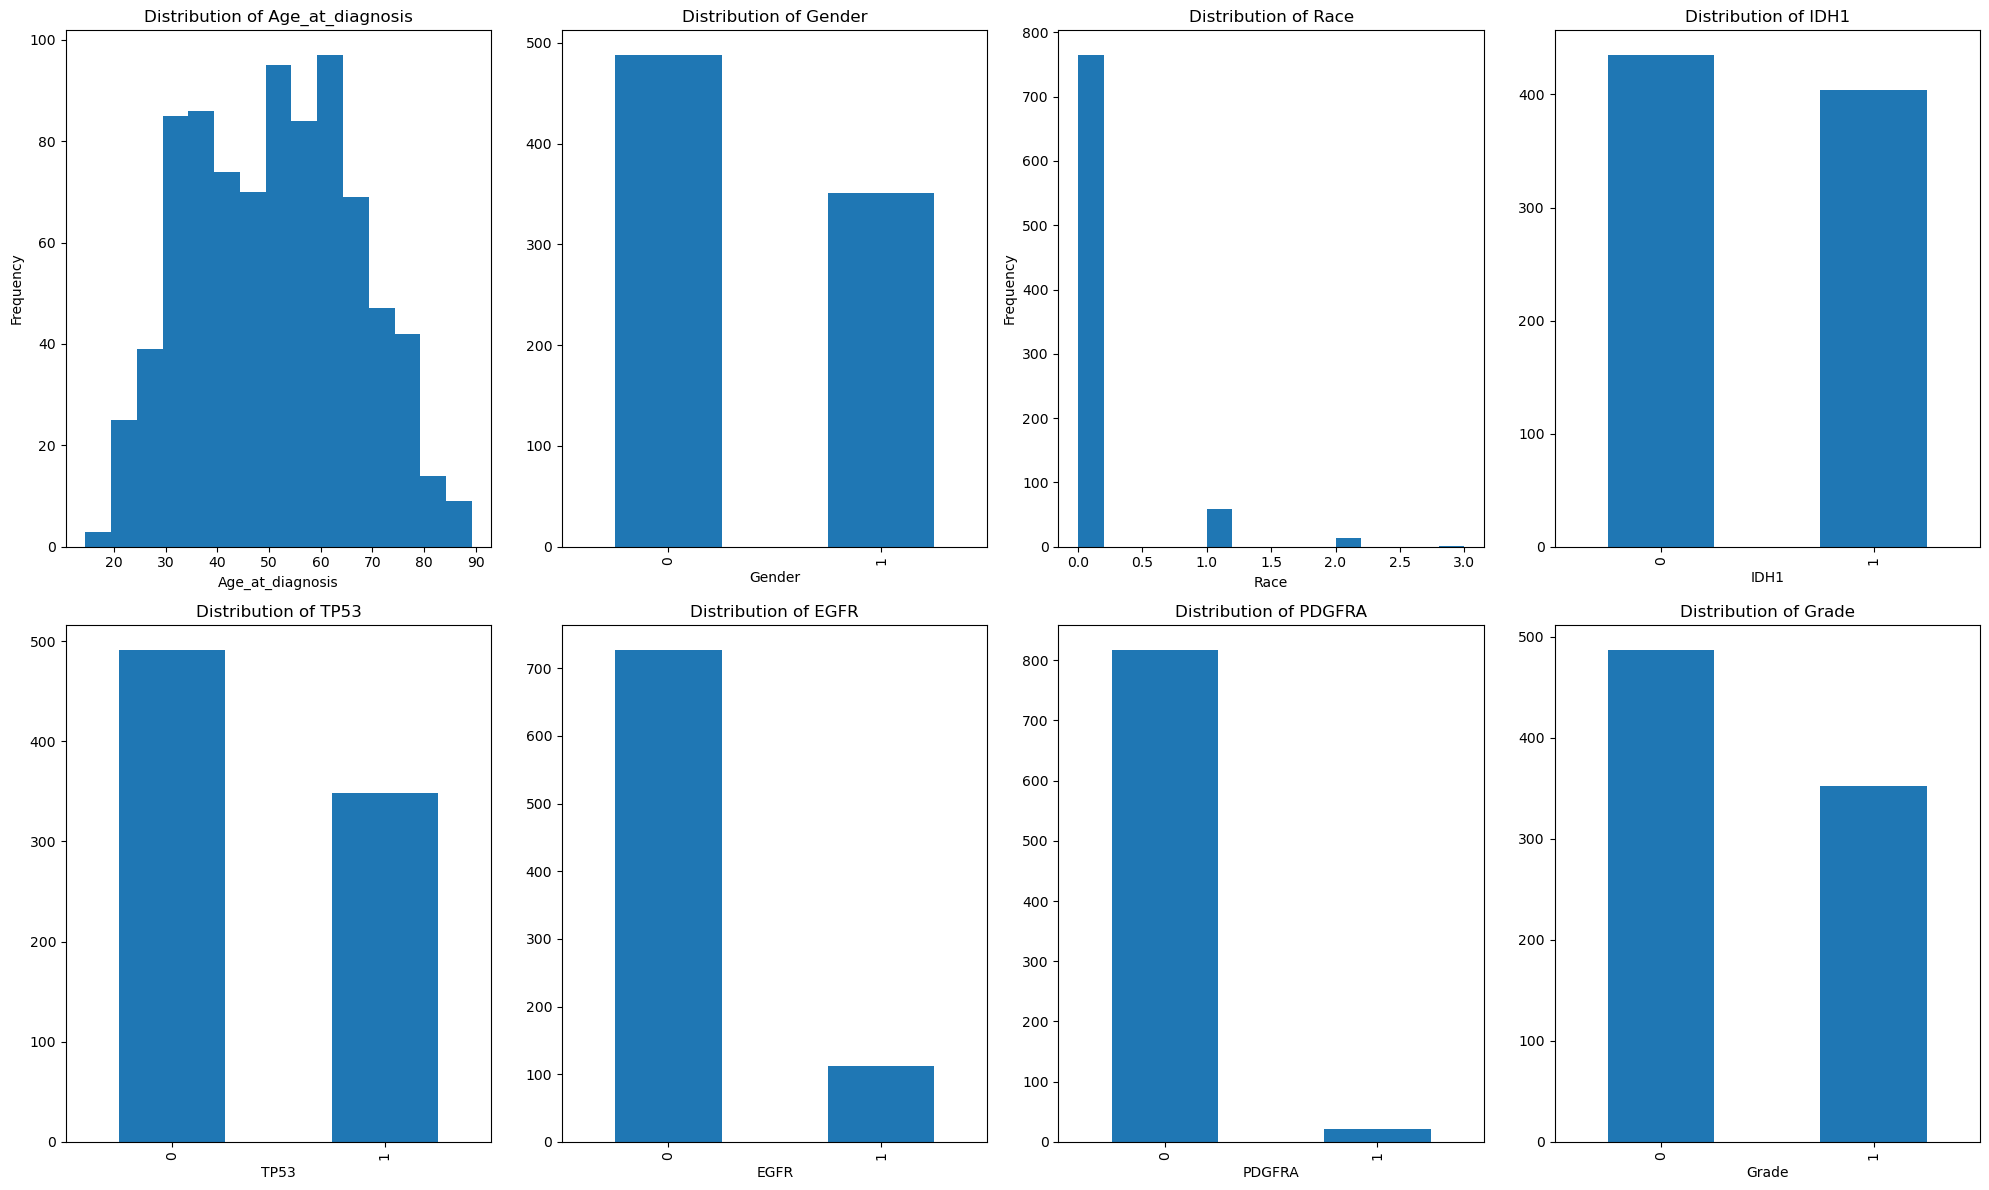

There's some skew with distribution of race, may not be equitable enough to optimize to more broad datasets

Here's a Brief visualization of our dataset

   Grade  Gender  Age_at_diagnosis  Race  IDH1  TP53  ATRX  PTEN  EGFR  CIC  \
0      0       0             51.30     0     1     0     0     0     0    0   
1      0       0             38.72     0     1     0     0     0     0    1   
2      0       0             35.17     0     1     1     1     0     0    0   
3      0       1             32.78     0     1     1     1     0     0    0   
4      0       0             31.51     0     1     1     1     0     0    0   

   ...  FUBP1  RB1  NOTCH1  BCOR  CSMD3  SMARCA4  GRIN2A  IDH2  FAT4  PDGFRA  
0  ...      1    0       0     0      0        0       0     0     0       0  
1  ...      0    0       0     0      0        0       0     0     0       0  
2  ...      0    0       0     0      0        0       0     0     0       0  
3  ...      0    0       0     0      0        0       

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

clinical_data = pd.read_csv('Grade_Info.csv')

selected_features = ['Age_at_diagnosis', 'Gender', 'Race', 'IDH1', 'TP53', 'EGFR', 'PDGFRA', 'Grade']

plt.figure(figsize=(20, 12))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 4, i)
    if clinical_data[feature].dtype == 'object' or len(clinical_data[feature].unique()) <= 2:
        clinical_data[feature].value_counts().plot(kind='bar')
    else:
        clinical_data[feature].plot(kind='hist', bins=15)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()

plt.show()
print("There's some skew with distribution of race, may not be equitable enough to optimize to more broad datasets")
print()
print("Here's a Brief visualization of our dataset")
print()
print(clinical_data.head())

## Feature Correlations/ Heatmaps
**We will be running a correlation analysis on these or a heat map to visualize how these variables correspond to one another**

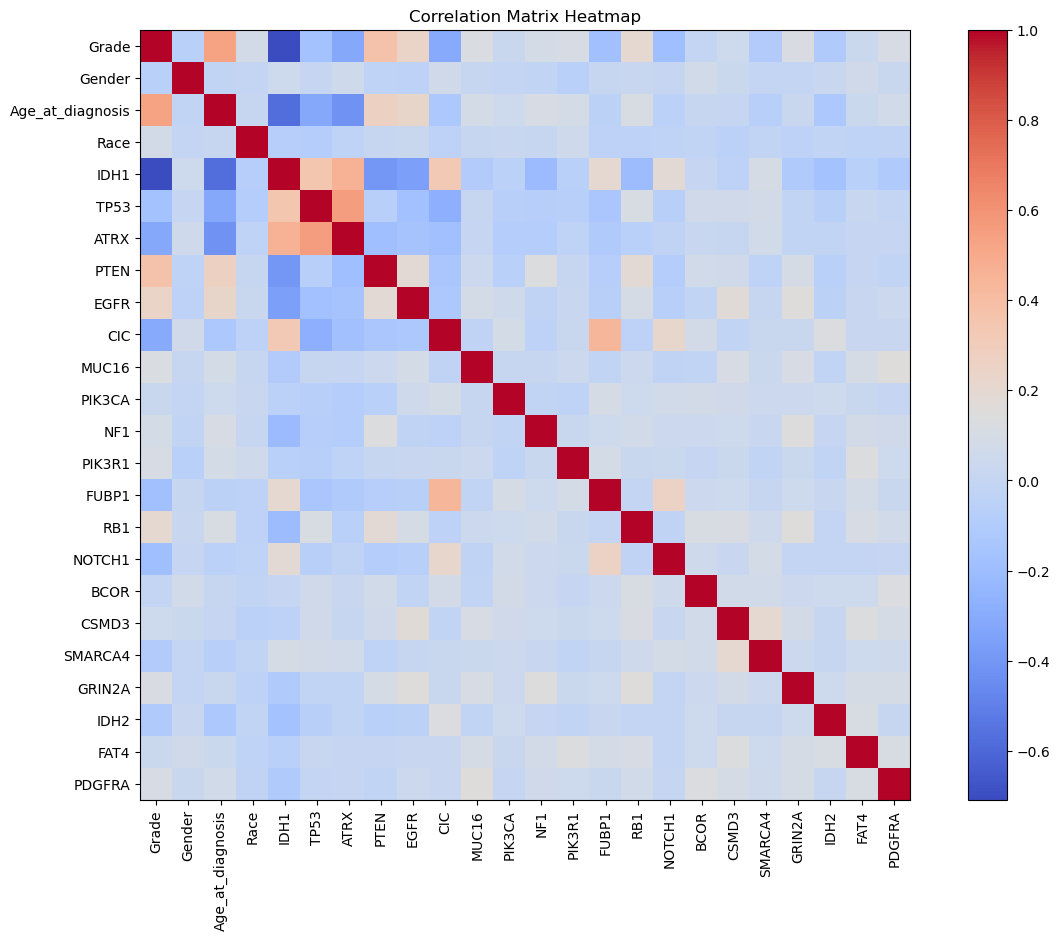

In [32]:
import numpy as np

correlation_matrix = clinical_data.corr()

plt.figure(figsize=(15, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Run a Principal Component Analysis

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

clinical_data = pd.read_csv('Grade_Info.csv')

features = clinical_data.drop('Grade', axis=1)
target = clinical_data['Grade']

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(features_scaled)


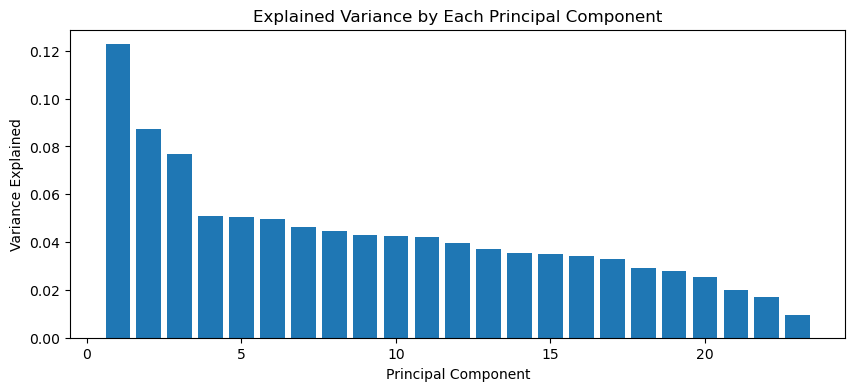

['saved_pca.pkl']

In [34]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA()
pca.fit(features_scaled)

plt.figure(figsize=(10, 4))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Each Principal Component')
plt.show()

import joblib

joblib.dump(scaler, 'saved_scaler.pkl')
joblib.dump(pca, 'saved_pca.pkl')


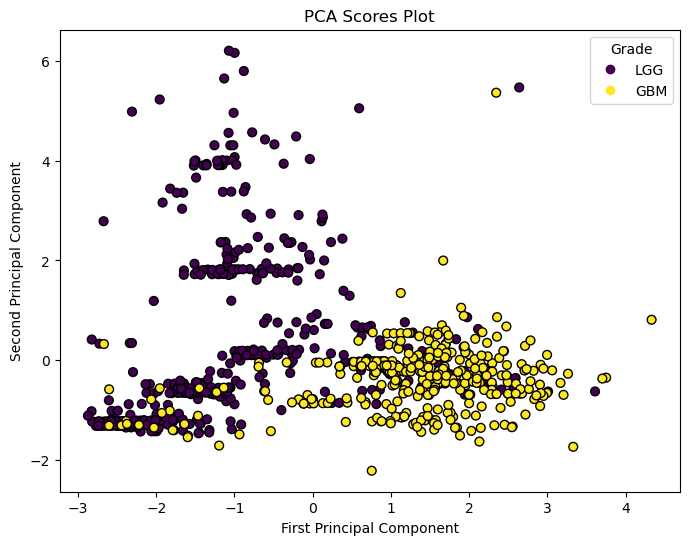

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA()
principal_components = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=target, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Scores Plot')
plt.legend(handles=scatter.legend_elements()[0], title='Grade', labels=['LGG', 'GBM'])
plt.show()

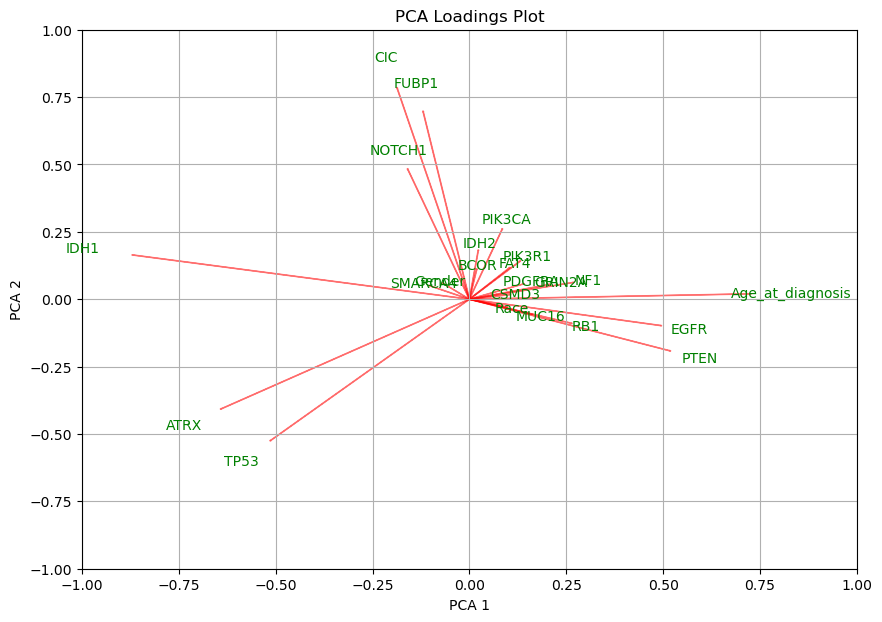

In [36]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
num_features = features.shape[1]
plt.figure(figsize=(10, 7))
for i in range(num_features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, features.columns[i], color='g', ha='center', va='center')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Loadings Plot')
plt.grid()

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()


## Investigate Predictive Modeling Capabilities

Use a cross validation method and see the scores across different techniques: 


In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

log_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
svm = SVC()

models = [log_reg, random_forest, svm]

model_scores = {}

for model in models:
    scores = cross_val_score(model, principal_components, target, cv=5)
    model_scores[model.__class__.__name__] = scores.mean()

print(model_scores)
print()
print("Higher scores indicate better average performance of the model on the dataset.Compare the scores to see which model performs best. This model might be the most suitable for the particular task of classifying glioma grades.")

{'LogisticRegression': 0.8748502994011975, 'RandomForestClassifier': 0.8307599087539208, 'SVC': 0.8629526660963787}

Higher scores indicate better average performance of the model on the dataset.Compare the scores to see which model performs best. This model might be the most suitable for the particular task of classifying glioma grades.


In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

n_iterations = 1000

log_reg = LogisticRegression(max_iter=1000)
svm = SVC()

log_reg_scores = []
svm_scores = []

for i in range(n_iterations):

    X_sample, y_sample = resample(principal_components, target)

    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3)

    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    log_reg_scores.append(accuracy_score(y_test, y_pred))

    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    svm_scores.append(accuracy_score(y_test, y_pred))

log_reg_avg, log_reg_std = np.mean(log_reg_scores), np.std(log_reg_scores)
svm_avg, svm_std = np.mean(svm_scores), np.std(svm_scores)

print(f"Logistic Regression: {log_reg_avg:.3f} +/- {log_reg_std:.3f}")
print(f"SVM: {svm_avg:.3f} +/- {svm_std:.3f}")
print()
print("This analysis of the bootstrapping shows very similar results to the CV of both techniques, there is slightly higher averages of about 1% point. The best way to get this into the 90s would be more and better data, regularization, and some hyperparamter tuning.")

Logistic Regression: 0.870 +/- 0.022
SVM: 0.878 +/- 0.021

This analysis of the bootstrapping shows very similar results to the CV of both techniques, there is slightly higher averages of about 1% point. The best way to get this into the 90s would be more and better data, regularization, and some hyperparamter tuning.


## Compare SVM vs. Logistic Regression Predictions

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


X_train, X_test, y_train, y_test = train_test_split(principal_components, target, test_size=0.3, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
svm = SVC()

log_reg.fit(X_train, y_train)

log_reg_predictions = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, log_reg_predictions))
print(classification_report(y_test, log_reg_predictions))

svm.fit(X_train, y_train)

svm_predictions = svm.predict(X_test)

print("\nSVM Performance:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

import joblib

joblib.dump(log_reg, 'logistic_regression_model.pkl')
joblib.dump(svm, 'svm_model.pkl')


Logistic Regression Performance:
Accuracy: 0.8809523809523809
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       150
           1       0.82      0.90      0.86       102

    accuracy                           0.88       252
   macro avg       0.88      0.88      0.88       252
weighted avg       0.89      0.88      0.88       252


SVM Performance:
Accuracy: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       150
           1       0.78      0.91      0.84       102

    accuracy                           0.86       252
   macro avg       0.85      0.87      0.86       252
weighted avg       0.87      0.86      0.86       252



['svm_model.pkl']

**Precision**: Measures how many of the predicted positive cases are actually positive. It focuses on the purity of the positive predictions.

**Recall**: Assesses how many of the actual positive cases are correctly identified by the model. It's about the model's ability to capture all relevant instances.

**Accuracy**: Indicates the overall correctness of the model, i.e., the proportion of true predictions (both positive and negative) among the total number of cases.

**F1 Score**: Combines precision and recall into a single metric by taking their harmonic mean. It's useful for comparing models when you seek a balance between precision and recall.

**Support**: This is the number of instances of 0 or 1 in that dataset(both predicted same number of 0s and 1s - could be in a different order tho

## Results:

**Logistic Regression:**

Accuracy: Approximately 88.1%, indicating a high overall rate of correct predictions.

Precision and Recall for Class 0 (LGG): High precision (93%) and good recall (87%). This means the model is quite reliable at predicting LGG cases and has a relatively low rate of false positives.

Precision and Recall for Class 1 (GBM): Good precision (82%) and high recall (90%). The model is slightly less precise but more sensitive in identifying GBM cases.

F1-Score: Balanced F1-scores for both classes (0.90 for LGG, 0.86 for GBM), indicating a good balance between precision and recall.

**SVM (Support Vector Machine):**

Accuracy: Approximately 85.7%, which is slightly lower than Logistic Regression but still indicates good performance.

Precision and Recall for Class 0 (LGG): High precision (93%) but lower recall (82%) compared to Logistic Regression. This suggests a higher number of false negatives for LGG.

Precision and Recall for Class 1 (GBM): Lower precision (78%) and high recall (91%) compared to Logistic Regression. The model is more sensitive but less precise in predicting GBM cases.

F1-Score: Similar F1-scores for both classes (0.87 for LGG, 0.84 for GBM), which shows good performance but a slight drop in precision for both classes compared to Logistic Regression.

**Logistic Regression has slightly higher overall accuracy and demonstrates a better balance between precision and recall for both classes.
SVM is more sensitive (higher recall) in predicting GBM cases but at the cost of some precision, particularly for predicting LGG cases.**

## Now for New Predictions on an Unlabeled Dataset:

1) pre-process the data in a way that we are able to run PCA analysis and input into the fitted model 
2) Load Data onto the Pre-trained model
3) Generate Predictions for the new Data


### Pre-process Data and Fit to both Models

preprocess data through the saved methods above of our scaler and pca analysis - saved into our local drives

In [40]:

new_data = pd.read_csv('Grade_Info2.csv')

new_data_features = new_data.drop('Grade', axis=1) 


scaler = joblib.load('saved_scaler.pkl')
pca = joblib.load('saved_pca.pkl')

new_data_scaled = scaler.transform(new_data_features)
new_data_pca = pca.transform(new_data_scaled)

log_reg = joblib.load('logistic_regression_model.pkl')
svm = joblib.load('svm_model.pkl')

log_reg_predictions = log_reg.predict(new_data_pca)

svm_predictions = svm.predict(new_data_pca)



### Visualize the data

This will first create a new file to your new machine called predictions.csv which is a complete coloumn of the grade predictions that can be copy pasted to your own excel based on the patients inputted. It also prints a brief overview in pandas tabular format

In [41]:
import pandas as pd

predictions_df = pd.DataFrame({
    'Logistic_Regression_Predictions': log_reg_predictions,
    'SVM_Predictions': svm_predictions
})

predictions_df.to_csv('predictions.csv', index=False)

print(predictions_df)


     Logistic_Regression_Predictions  SVM_Predictions
0                                  0                0
1                                  0                0
2                                  0                0
3                                  0                0
4                                  0                0
..                               ...              ...
834                                1                1
835                                1                1
836                                1                1
837                                1                1
838                                1                1

[839 rows x 2 columns]


## ROC Curves Comparison

see how each model is performing and strengths/ weaknesses

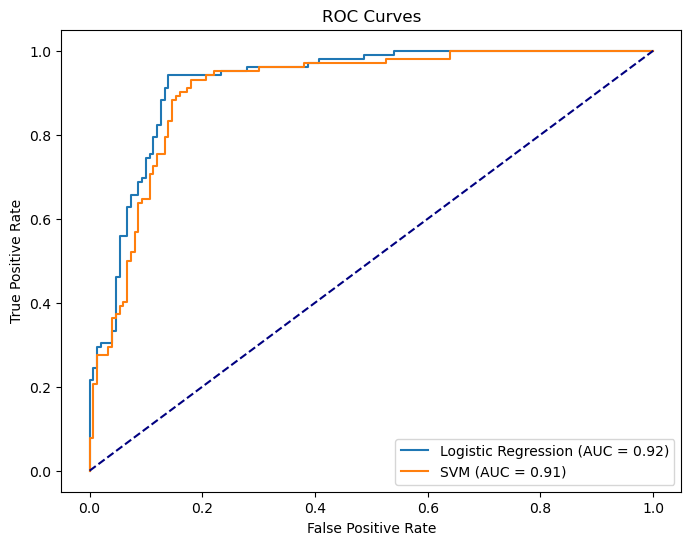

In [42]:
from sklearn.metrics import roc_curve, auc

fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.decision_function(X_test))
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.decision_function(X_test))

auc_log = auc(fpr_log, tpr_log)
auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='best')
plt.show()


## Saving Updated Data to Local Machine

This will create an updated version of the data on the local machine called 'updated_path name'

In [13]:
import pandas as pd

original_data = pd.read_csv('Grade_info2.csv')

if len(predictions_df) == len(original_data):
    original_data['Grade'] = predictions_df['Logistic_Regression_Predictions']  

    original_data.to_csv('Updated_Grade_info2.csv', index=False)
else:
    print("Error: The length of the predictions does not match the original data.")

## Optimizations of the model

**Let's see if we can optimize through some regularization and hyperparameter tuning**

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

param_grid = {
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1], 
    'C': [0.01, 0.1, 1, 10, 100]        
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(principal_components, target)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters: {'C': 0.1, 'l1_ratio': 1}
Best score: 0.8760550327915597


## Run the Elastic Net and Make Predictions

In [15]:
from sklearn.linear_model import LogisticRegression

elastic_net_log_reg = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)

elastic_net_log_reg.fit(X_train, y_train)

predictions = elastic_net_log_reg.predict(X_test)

print("Predictions:", predictions)


Predictions: [0 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1
 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1
 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0
 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1]


## Can we Optimize our Models with Neural Networks? -Multilayer Perceptron(MLP)

create the neural network flow, fit train data and test it in the next box

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid') 
])

model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
15/15 [==============================] - 0s 12ms/step - loss: 0.6571 - accuracy: 0.6183 - val_loss: 0.5202 - val_accuracy: 0.8305
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 0.5190 - accuracy: 0.7846 - val_loss: 0.4179 - val_accuracy: 0.8814
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8507 - val_loss: 0.3627 - val_accuracy: 0.8814
Epoch 4/50
15/15 [==============================] - 0s 1ms/step - loss: 0.4082 - accuracy: 0.8465 - val_loss: 0.3361 - val_accuracy: 0.8898
Epoch 5/50
15/15 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8507 - val_loss: 0.3161 - val_accuracy: 0.8898
Epoch 6/50
15/15 [==============================] - 0s 1ms/step - loss: 0.3754 - accuracy: 0.8699 - val_loss: 0.3080 - val_accuracy: 0.8898
Epoch 7/50
15/15 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8550 - val_loss: 0.3077 - val_accuracy: 0.8729
Epoch 8/50
15/15 [=

In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


8/8 [==============================] - 0s 520us/step - loss: 0.3829 - accuracy: 0.8413
Test Accuracy: 84.13%


## Cross Validate the New Model 

This is done in a separate way than running the CV on more basic models

In [18]:
from sklearn.model_selection import KFold
import numpy as np

n_folds = 5

kf = KFold(n_folds, shuffle=True, random_state=42)

scores = []

for train_index, test_index in kf.split(principal_components):

    X_train, X_test = principal_components[train_index], principal_components[test_index]
    y_train, y_test = target[train_index], target[test_index]

    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0) 

    score = model.evaluate(X_test, y_test, verbose=0)
    scores.append(score[1])  

average_score = np.mean(scores)
print(f'Average Score: {average_score}')


Average Score: 0.857014536857605


## Lets also Run Bootstrapping on the MLP 

we ran the bootstrap algorithm and tested the model fit - had a higher accuracy than before with CV(Because CV will overestimate the prediction error and underestimate the accuracy

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

n_iterations = 100 
n_size = int(len(principal_components) * 0.50) 
bootstrap_scores = []

for i in range(n_iterations):
 
    X_sample, y_sample = resample(principal_components, target, n_samples=n_size)
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)
    

    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    score = model.evaluate(X_test, y_test, verbose=0)
    bootstrap_scores.append(score[1])

mean_score = np.mean(bootstrap_scores)
print(f'Mean Accuracy: {mean_score}')


Mean Accuracy: 0.8722222149372101
